In [1]:
import exifread
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import math
from PIL import Image

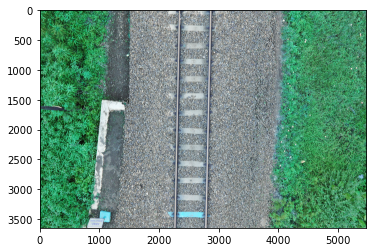

In [2]:
# Membaca gambar original

img = cv2.imread('DJI_0585.JPG')
plt.imshow(img)


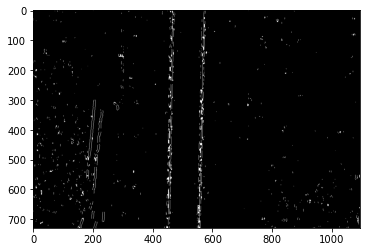

In [3]:
scale_percent = 20
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# # Mengubah skala
full_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
# # Merubah gambar menjadi grayscale
gray = cv2.cvtColor(full_img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, 'gray')

# Blur image and filter to make rail lines more detectable.
blur = cv2.GaussianBlur( gray,(7, 7), 7 )
#plt.imshow(blur, 'gray')

# Menerapkan sobel
sobelx2 = cv2.Sobel( blur, cv2.CV_64F, 1, 0, ksize=3 )
#plt.imshow(sobelx2, 'gray')

# Menerapkan sobel absolute
abs_sobel64f = np.absolute( sobelx2 )
#plt.imshow(abs_sobel64f, 'gray')

# Merubah format
sobel_x = np.uint8( abs_sobel64f )
#plt.imshow(sobel_x,'gray')

# # mendeteksi tepi
edged = cv2.Canny( sobel_x, 300, 325 )
#plt.imshow(edged,'gray')
edged = cv2.dilate(edged, None, iterations=1)
#plt.imshow(edged,'gray')
edged = cv2.erode(edged, None, iterations=1)
plt.imshow(edged,'gray')

In [4]:
lines = cv2.HoughLinesP(edged, 1, np.pi/180, 10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(full_img, (x1,y1), (x2,y2), (0, 0, 255), 1)

lines = cv2.HoughLinesP(edged, 1, np.pi/180, 120, minLineLength=50, maxLineGap=100)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(full_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
distance = []
for line in lines:
    distance.append(np.linalg.norm(line[:,:2] - line[:,2:]))

print('max distance:',max(distance),'\nmin distance:',min(distance))

# Adjusting the best distance 
bestDistance=1

numberOfLines=[]
count=0
for x in distance:
    if x>bestDistance:
        numberOfLines.append(x)
        count=count+1

max distance: 726.1163818562421 
min distance: 246.272207120495


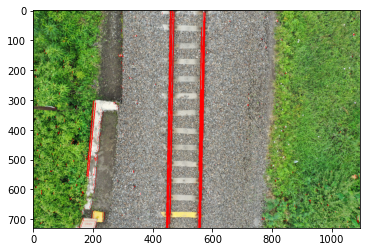

In [5]:
gry = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)
plt.imshow(gry)

In [6]:


# reading the image
img = gry

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:

        # displaying the coordinates
        # on the Shell
        
        print(str(x)+ ','+ str(y))
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        
    # checking for right mouse clicks	
    if event==cv2.EVENT_RBUTTONDOWN:

        # displaying the coordinates
        # on the Shell
        print(str(x)+ ','+ str(y))
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)

# driver function
if __name__=="__main__":

    # displaying the image
    cv2.imshow('image', img)
    
    
    # setting mouse hadler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
    # wait for a key to be pressed to exit
    cv2.waitKey(0)

    # close the window
    cv2.destroyAllWindows()
    f.close()

In [7]:
import pandas as pd
cols = ['x','y']
df = pd.read_csv("jkoordinat.csv",names=cols,header=None)
df.head()

,x,y
0,466,0
1,450,730


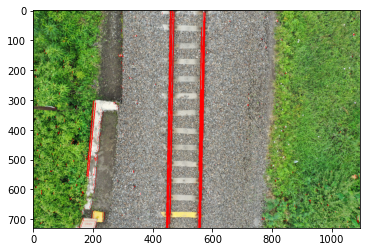

In [8]:
plt.imshow(gry)

8559
[8, 18, 18719/625]
[114, 16, 335469/10000]


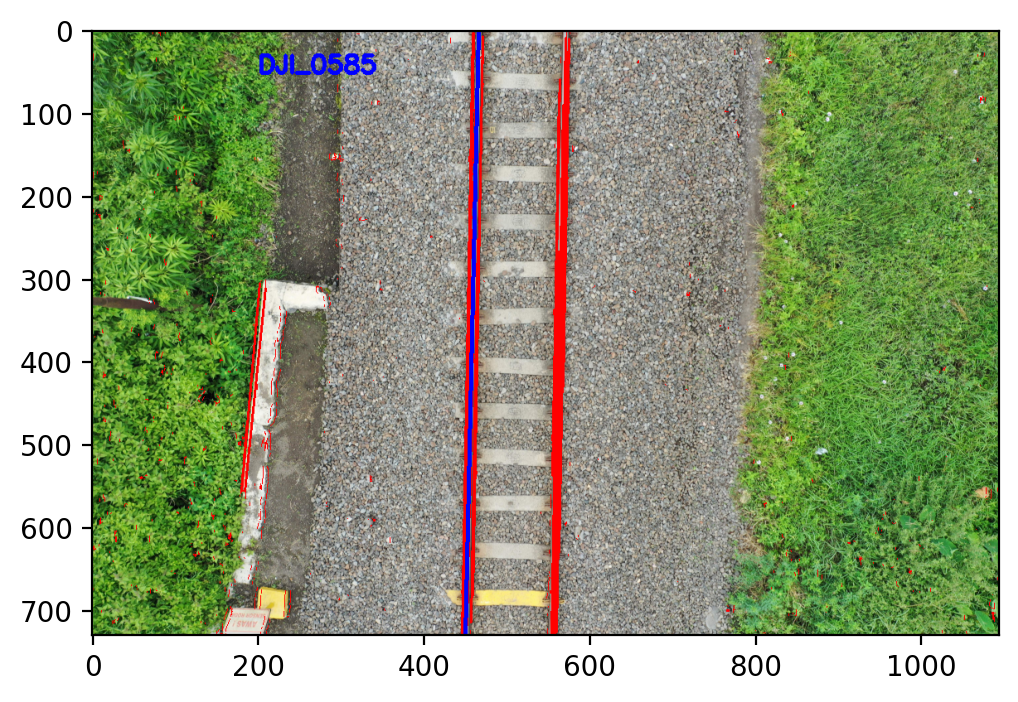

In [9]:
this_image= gry.copy()
half = int(df.shape[0]/2)+1
for i in range(1,half):
    j=i*2
    x_1 = df.iloc[j-2,0]
    y_1 = df.iloc[j-2,1]
    x_2 = df.iloc[j-1,0]
    y_2 = df.iloc[j-1,1]
    
    k=11.723 #piksel per mm
    dist = math.sqrt( (x_2 - x_1)**2 + (y_2 - y_1)**2 )
    distance= int(dist*k)
    label = str(distance)+' mm'
    print(distance)
    
    cv2.line(this_image, (x_1,y_1), (x_2,y_2), (0,0,255), 3)
    cv2.putText(this_image, label, (x_1-80, y_1-10), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255,0), 2)
    cv2.putText(this_image, 'DJI_0585', (200, 50), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 0,255), 3)

plt.figure(dpi=200)
plt.imshow(this_image)

import exifread

tags = exifread.process_file(open('DJI_0584.jpg', 'rb'))
geo = {i:tags[i] for i in tags.keys() if i.startswith('GPS')}

print(geo["GPS GPSLatitude"])
print(geo["GPS GPSLongitude"])

In [10]:
# cv2.imwrite('pDJI_0585.PNG', this_image)